In [1]:
#Bitcoin Basic EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
#statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

/kaggle/input/bitcoin-price-dataset-from-sept-2014-to-oct-2021/BTC-USD.csv


In [2]:
data = pd.read_csv("/kaggle/input/bitcoin-price-dataset-from-sept-2014-to-oct-2021/BTC-USD.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [4]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [6]:
data.shape

(2587, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2587 entries, 0 to 2586
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2587 non-null   object 
 1   Open       2583 non-null   float64
 2   High       2583 non-null   float64
 3   Low        2583 non-null   float64
 4   Close      2583 non-null   float64
 5   Adj Close  2583 non-null   float64
 6   Volume     2583 non-null   float64
dtypes: float64(6), object(1)
memory usage: 141.6+ KB


In [8]:
data.dropna(inplace=True)

In [9]:
def boxplot(data):
    sns.set_theme(style="whitegrid")
    ax = sns.boxplot(data=data, orient="h", palette="Set2")

In [10]:
def line(x, y, xlabel, ylabel, title):
    fig, ax = plt.subplots(figsize=(14, 4))
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.plot(x, y)
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
    ax.grid()
    plt.show()

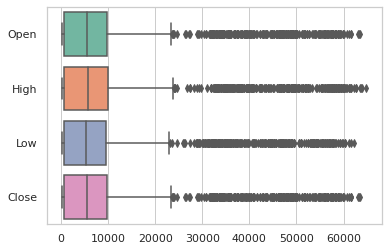

In [11]:
#General comparisons
boxplot(data[['Open','High','Low', 'Close']])

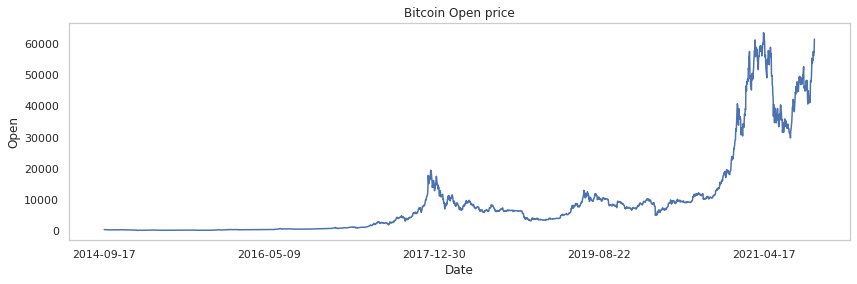

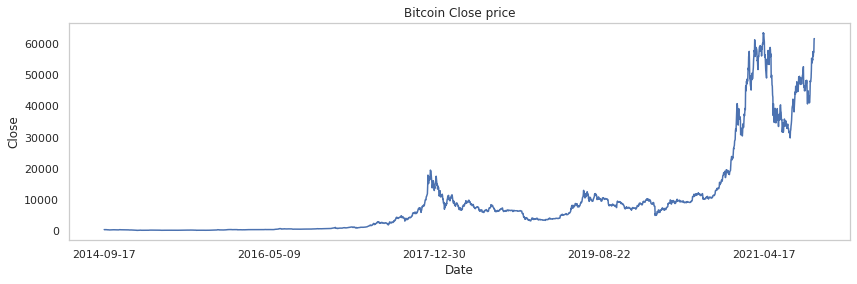

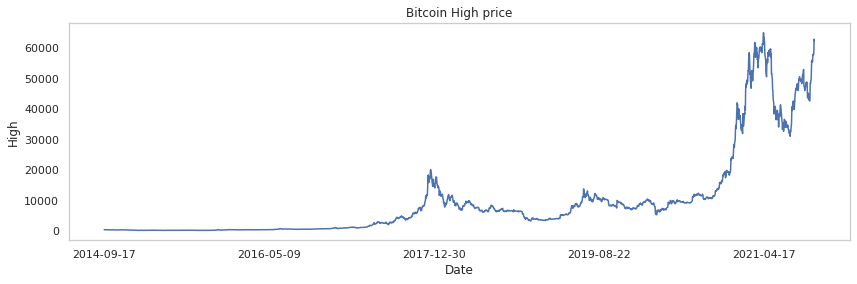

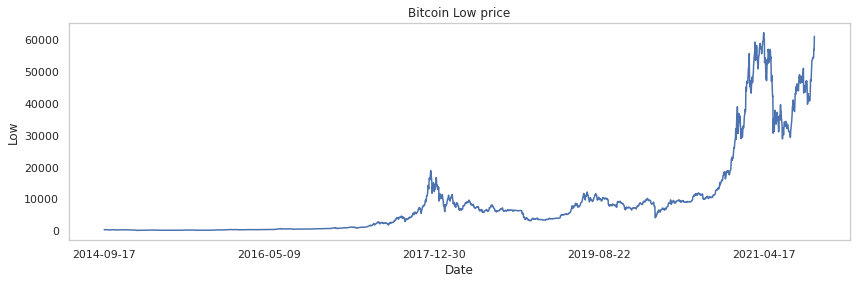

In [12]:
line(data.Date, data.Open, 'Date', 'Open', 'Bitcoin Open price')
line(data.Date, data.Close, 'Date', 'Close', 'Bitcoin Close price')
line(data.Date, data.High, 'Date', 'High', 'Bitcoin High price')
line(data.Date, data.Low, 'Date', 'Low', 'Bitcoin Low price')

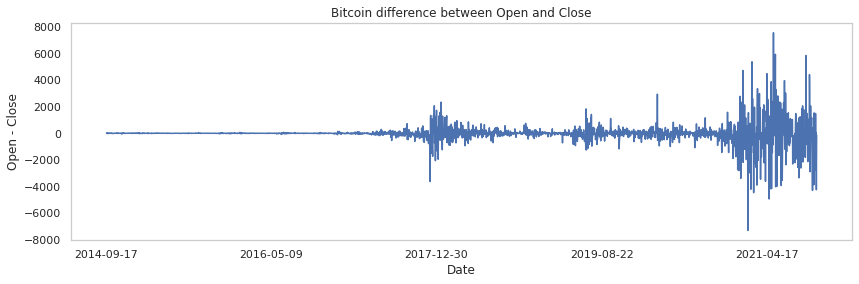

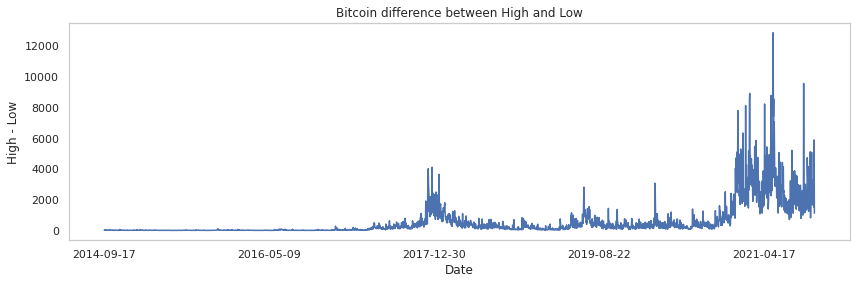

In [13]:
#difference
line(data.Date,data.Open - data.Close, 'Date', 'Open - Close', 'Bitcoin difference between Open and Close')
line(data.Date,data.High - data.Low, 'Date', 'High - Low', 'Bitcoin difference between High and Low')

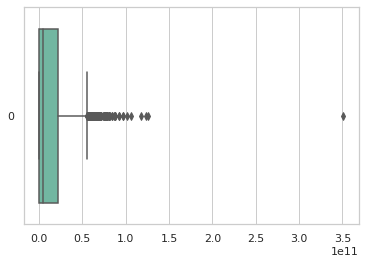

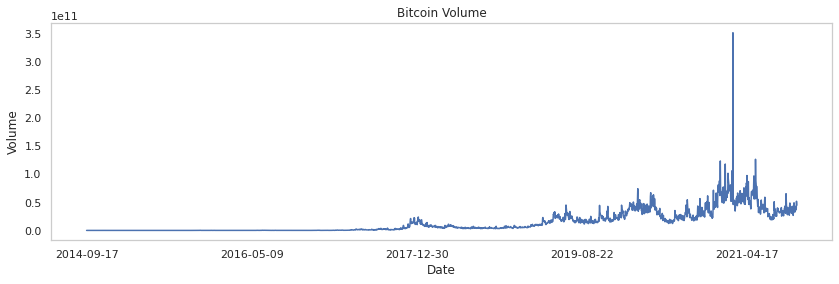

In [14]:
#Volume
boxplot(data.Volume)
line(data.Date, data.Volume, 'Date', 'Volume', 'Bitcoin Volume')

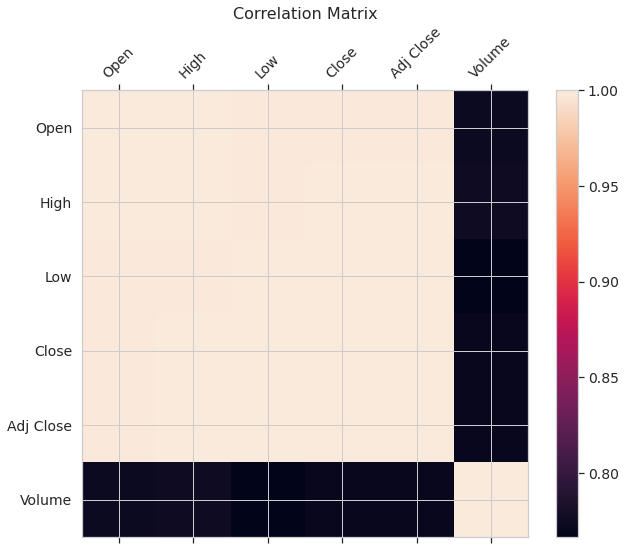

In [15]:
#Coorelation Matrix
f = plt.figure(figsize=(10, 8))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [16]:
#scatter
def scatter(x, y, xlabel, ylabel, title):
    fig, ax = plt.subplots()
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.scatter(x, y)
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
    ax.grid()
    plt.show()

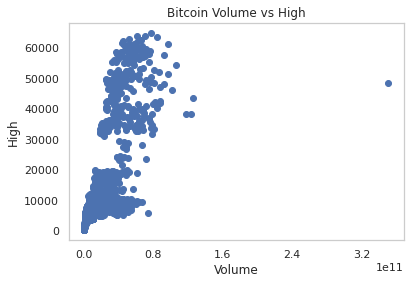

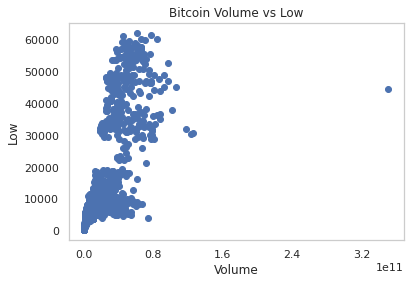

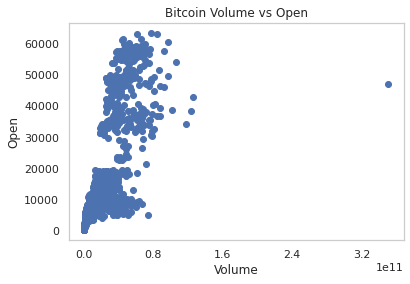

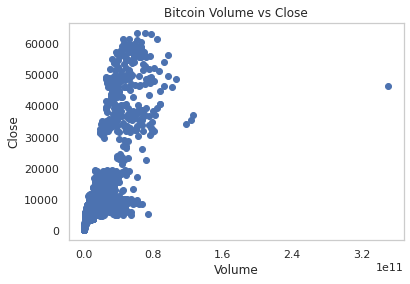

In [17]:
#Volume vs prices
scatter(data.Volume, data.High, 'Volume', 'High', 'Bitcoin Volume vs High')
scatter(data.Volume, data.Low, 'Volume', 'Low', 'Bitcoin Volume vs Low')
scatter(data.Volume, data.Open, 'Volume', 'Open', 'Bitcoin Volume vs Open')
scatter(data.Volume, data.Close, 'Volume', 'Close', 'Bitcoin Volume vs Close')

In [18]:
#Decomposition
#Multiplicative
multiplicative=seasonal_decompose(data.Close, model='multiplicative', period=1)
#Additive
additive=seasonal_decompose(data.Close, model='additive', period=1)

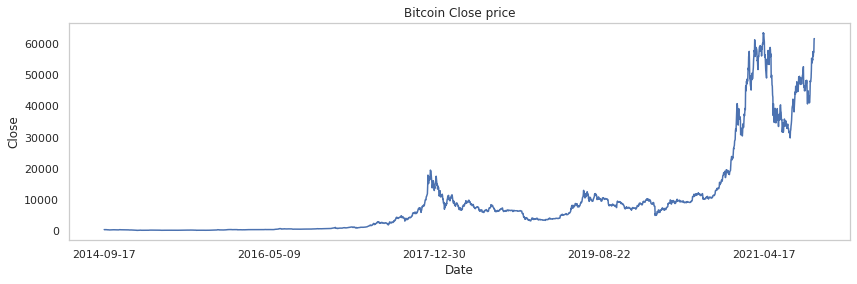

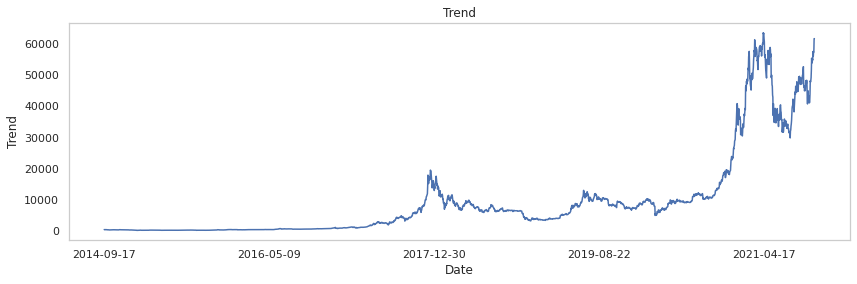

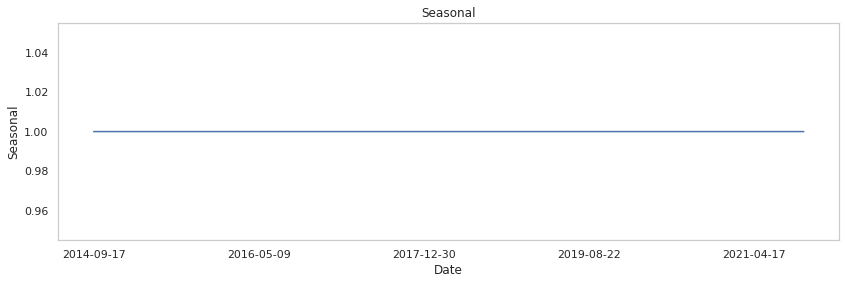

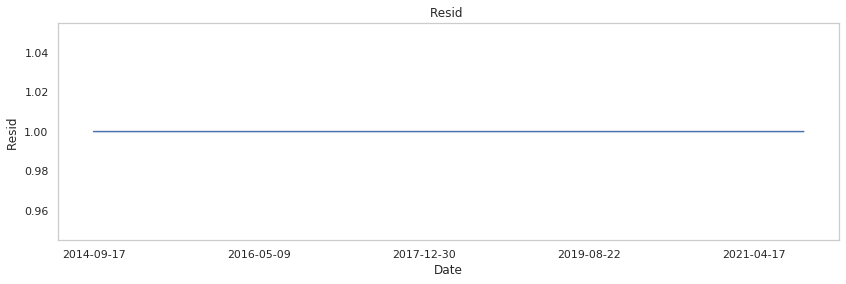

In [19]:
#Close Multiplicative decomposition
line(data.Date, data.Close, 'Date', 'Close', 'Bitcoin Close price')
line(data.Date, multiplicative.trend, 'Date', 'Trend', 'Trend')
line(data.Date, multiplicative.seasonal, 'Date', 'Seasonal', 'Seasonal')
line(data.Date, multiplicative.resid , 'Date', 'Resid ', 'Resid ')

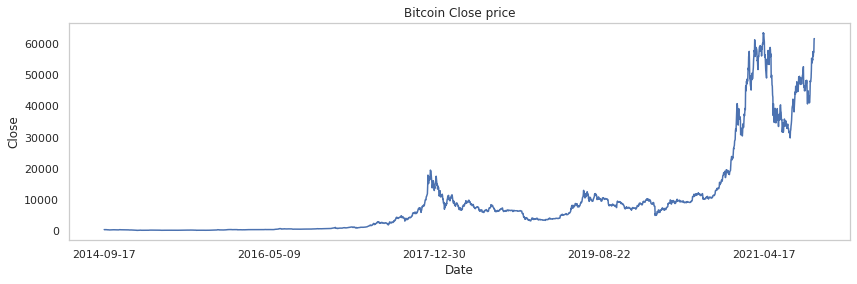

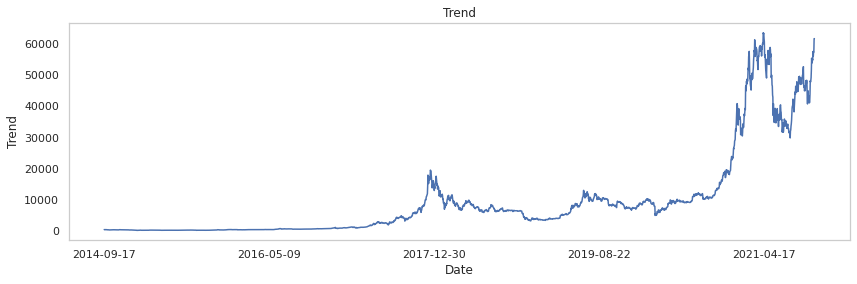

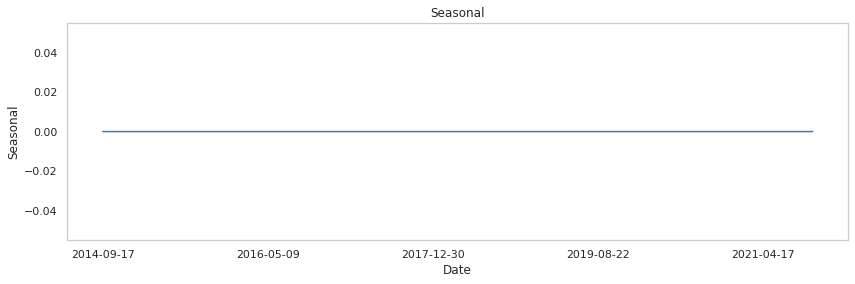

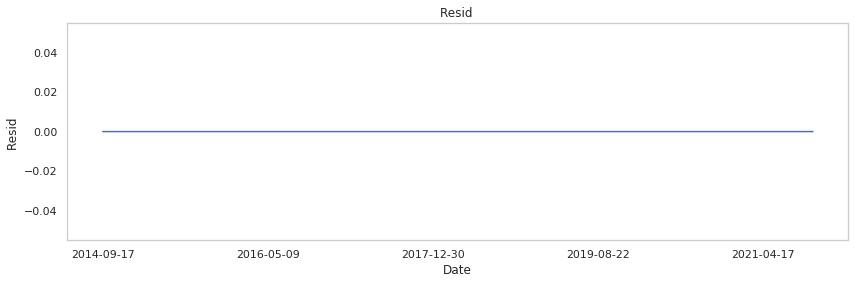

In [20]:
#Close Additive decomposition
line(data.Date, data.Close, 'Date', 'Close', 'Bitcoin Close price')
line(data.Date, additive.trend, 'Date', 'Trend', 'Trend')
line(data.Date, additive.seasonal, 'Date', 'Seasonal', 'Seasonal')
line(data.Date, additive.resid , 'Date', 'Resid ', 'Resid ')

In [21]:
#Adfuller
adfuller_return=adfuller(data.Close.values)

print(f'ADF Statistic: {adfuller_return[0]}')
print(f'P-value: {adfuller_return[1]}')

#series is non-stationary

ADF Statistic: 0.7284755299703922
P-value: 0.9903893475706665
